<a href="https://colab.research.google.com/github/Abhishek-Shubham001/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement:**

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Introduction**

Application distribution platform, for example, Play Store gets overwhelmed with millions of new applications being launched on the platform regularly. Lots of designers and developers work on it to make an app successful on the Play Store. In this highly competitive world, it is an immense challenge for a developer to know whether they are focusing on the right path to make their app successful on the platform.

To launch themselves successfully and create an identity for themselves in this oversaturated market, they need to ensure that the majority of the essential factors are incorporated while designing and developing an app that would play an important role in the customer's decision-making process. However, the lack of a clear understanding of the inner working and dynamic of popular app markets impacts both the developers and users.

The main objective of this exploratory data analysis project is to understand customer demands better and thus help developers to popularize their product on the Play Store.

## **App Engagement And Success Factors:**
---


**What Is App Engagement?**

---

**App engagement is defined by a set of metrics that measure user interaction with an app. Common engagement metrics can include how many times a user opens the app, the duration of a usage session, and what actions a user takes within an app.**

---
Now we have the basic idea that app engagement is nothing but measure of usage of application

---
Now the question arises how to measure it, that can be answered by evaluating the factors responsible for it.

---
*1.Number of downloads* 

*2.Total number of users (new and old)*

*3.Active app users*

*4.Session interval*

*5.Session length*

*6.Time in the app*

*7.Screen flow*

*8.Retention* 

*9.Conversation*

---

#### As we have access to few of the factors responsible for app engagement in the provided data i.e.

**Number of downloads:**

**To achieve app engagement, the very first step is reaching a substantially large number of downloads. This is considered the most important metric for measuring the user engagement since the vital objective is to consolidate a broad user base.**


**Retension:**

**If there are any actionable features in your app like signing up, making a transaction, filling a form, giving a review, etc you’ll want to measure how many users are getting converted to goal target.**

---

**After observing the User review data:**

**Conversation** a.k.a. **User review data Sentiments** can further be classified in two subcatogories : Polarity and Subjectivity


---

# **Approach:**

* We are provided with two datasets, one contains all the details of the app, and another one contains the user reviews of the respective app. By analyzing these two datasets, we must come up with the key factors that are responsible for app engagement and success.
* First we need to explore the type of data present in the dataset and define the contents and the datatype in each column.
* Once we define the contents in each column, we can identify and handle all the NaN and error values present in the dataset. We can also inspect the datatypes of the values in each column and convert it to an appropriate data type.
* Now we can analyze the data pipeline and come up with different visualizations.
* From the visualizations we can come up with insights and the factors responsible for the success of an app.

# **What is Exploratory Data Analysis?**

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets for patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset and summarize their main characteristics, often employing data visualization methods. It is an important step in any Data Analysis or Data Science project. It helps determine how best to manipulate data sources to get the answers you need.


EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better and make it more attractive and appealing.

The following are the various steps involved in the EDA process:
1. <b>Problem Statement</b> - We shall brainstorm and understand the given data set. We shall study the attributes present in it and try to do a philosophical analysis about their meaning and importance for this problem.
2. <b>Data Cleaning</b> - We shall clean the dataset and handle the missing data, outliers and categorical variables.
3. <b>Hypothesis</b> - Upon studying the attributes present in the data base, we shall develop some basic hypothesis on which we can work and play with the data to look for the varied results which we can get out of it.
4. <b>Univariate Analysis</b> - It is the simplest form of analyzing the data. In this we would initially pick up a single attribute and study it in and out. It doesn't deal with any sort of correlation and its major purpose is to describe. It takes data, summarizes that data and finds patterns in the data.
5. <b>Bivariate Analysis</b> - This analysis is related to cause and the relationship between the two attributes. We will try to understand the dependency of attributes on each other.
6. <b>Multivariate Analysis</b> - This is done when more than two variables have to be analyzed simultaneously.
7. <b>Testing Hypothesis</b> - We shall check if our data meets the assumptions required by most of the multivariate techniques.

In [368]:
# Importing the required libraries to read the csv files
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline

In [369]:
#Connecting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [370]:
# Reading the Play store and User Review CSV File

ps_df= pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Play Store App Review Analysis- Abhishek Shubham/Play Store Data.csv')

ur_df= pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Play Store App Review Analysis- Abhishek Shubham/User Reviews.csv')

In [371]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [372]:
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## **Let's Explore the Two Data Frames**

In [373]:
# Print the number of rows and columns in Play Store 
row= ps_df.index
row

RangeIndex(start=0, stop=10841, step=1)

In [374]:
# Print the Shape of two Data Frames
print(f'The shape of Play Store data frame is {ps_df.shape}')
print(f'The shape of User Review data frame is {ur_df.shape}')

The shape of Play Store data frame is (10841, 13)
The shape of User Review data frame is (64295, 5)


In [375]:
# Print the columns of both Data Frames
print(ps_df.columns)
print(ur_df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


### **1. Exploring Play Store Data Frame**

In [376]:
# # Print the number of rows and columns in Play Store DF
row= ps_df.shape[0]
col= ps_df.shape[1]
print(f"The number of rows in Play Store DF is {row} and the number of columns is {col}.")

The number of rows in Play Store DF is 10841 and the number of columns is 13.


In [377]:
#Checking top 5 observations of PlayStore DF
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [378]:
#Checking bottom 5 observations of PlayStore DF
ps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


**Findings**

Play Store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:

* `App`: Contains the name of the app with a short description (optional).
* `Category`: It gives the category to the app.
* `Rating`: It contains the average rating the respective app received from its users.
* `Reviews`: It contains the number of users that have dropped a review for the respective app.
* `Size`: It contains the disk space required to install the respective app.
* `Installs`: It gives the rounded figure of the number of times the respective app was downloaded.
* `Type`: It states whether an app is free to use or paid.
* `Price`: It gives the price payable to install the app. For free type apps, the price is zero.
* `Content rating`: It states whether or not an app is suitable for all age groups or not.
* `Genres`: It gives the genre(s) to which the respective app belongs.
* `Last updated`: It gives the day in which the latest update was released.
* `Current Ver`: It gives the current version of the respective app.
* `Android Ver`: It gives the android version of the respective app.

In [379]:
# Function to print the basic summary like data_type, count of apps , missing values in each columns and nomber of unique elements in each column
def PSinfo(data):
    temp = pd.DataFrame(index=data.columns)
    temp['Data_type'] = data.dtypes
    temp["Count_of_non_null_values"] = data.count()
    temp['NaN_values'] = data.isnull().sum()
    temp['% NaN_values'] = (temp['NaN_values']/len(data)).round(4)*100
    temp['Unique_count'] = data.nunique()
    return temp 
PSinfo(ps_df)

,Data_type,Count_of_non_null_values,NaN_values,% NaN_values,Unique_count
App,object,10841,0,0.00,9660
Category,object,10841,0,0.00,34
Rating,float64,9367,1474,13.60,40
Reviews,object,10841,0,0.00,6002
Size,object,10841,0,0.00,462
Installs,object,10841,0,0.00,22
Type,object,10840,1,0.01,3
Price,object,10841,0,0.00,93
Content Rating,object,10840,1,0.01,6
Genres,object,10841,0,0.00,120


**Findings**

The number of Missing values in each columns are:

1. **Rating**: It has 1474 NaN values contributing 13.60% of the data.
2. **Type**: It has only 1 NaN value which results 0.01% of the data
3. **Content Rating**: It has also 1 NaN value resulting 0.01% of the data
4. **Current Ver**: It has 8 missing values contributing 0.07% of the data
5. **Android Ver**: It has 3 NaN Values contributing 0.03% of the data.

### **2. Exploring the User Reviews DataFrame**

In [380]:
# # Print the number of rows and columns in User Reviews DF
row= ur_df.shape[0]
col= ur_df.shape[1]
print(f"The number of rows in User Review DF is {row} and the number of columns is {col}.")

The number of rows in User Review DF is 64295 and the number of columns is 5.


In [381]:
#Checking top 5 observations of User Reviews DF
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [382]:
#Checking bottom 5 observations of User Reviews DF
ur_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


**Findings**

User Reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:
1. `App` - It tells us about the name of the application.
2. `Translated_Review` - It tells us about what the users feedback is about the application.
3. `Sentiment` - It tells us about a view or opinion(negative or positive sentiment) of the user w.r.t. the application.
4. `Sentiment_Polarity` - Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e., it determines if the text expresses the positive, negative or neutral sentiment of the user about the application.
5. `Sentiment_Subjectivity` - It refers to the text that contains text which is usually expressed by a human having typical moods, emotions, and feelings. Mostly it is a public opinion and not factual information. 

In [383]:
# Function to print the basic summary like data_type, count of apps , missing values in each columns and number of unique elements in each column
PSinfo(ur_df)

,Data_type,Count_of_non_null_values,NaN_values,% NaN_values,Unique_count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


**Findings**

All the columns(except App column) have 26863 missing entries which contributes to 41.78% of the User Review data.

## **Handling Missing Data**

### **1. Imputing the NaN values in the Play store data**

In [384]:
# Print the number of null values in each columns

ps_df.isnull().sum().sort_values(ascending= False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

Let us try to handle these NaN values one column at a time.

Let's find the percentage of rows that contain at least one NaN value.

In [385]:
# Percentage of rows that contains atleast one NaN value

Total_Nan= sum([True for index, row in ps_df.iterrows() if any(row.isnull())])
Percentage_Nan= round((Total_Nan / len(ps_df))*100, 2)

print(f'Hence, there are a total of {Total_Nan}({Percentage_Nan}%) rows which contain atleast one NaN value.')

Hence, there are a total of 1481(13.66%) rows which contain atleast one NaN value.


Since approximately 13.66% of all the rows in the dataset contains at least one NaN value, it is not practical to eliminate all the rows containing NaN values. We need to handle this problem in another way.

Let's first handle columns with less number of NaN values.

**1. `Android Ver`: There are a total of 3 NaN values in this column.**

In [386]:
ps_df[ps_df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Observation**

- There are total three entries with NaN in `Android Ver` column
- Row corresponding to index 10472 contains a lot of errors. For example, the `Category` contains 1.9 which is not true, `Rating` contains 19.0 which does not make any sense as the apps are rated between 0 to 5. So it is best to remove this row from the Play Store data.

In [387]:
# Exploring the unique values which 'Android Ver' column takes
ps_df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

Since the NaN values in `Android Ver` columns cannot be replaced with any particular values and since there are only 3 NaN values which accounts to 0.03% of data. So all 3 NaN values can be dropped.

In [388]:
# Dropping rows corresponding to NaN values in 'Android Ver' column
ps_df.dropna(subset=['Android Ver'], axis= 0, inplace= True)


In [389]:
#Checking the shape of the Dataframe
ps_df.shape

(10838, 13)

In [390]:
#Checking NaN values in each columns
ps_df.isnull().sum().sort_values(ascending= False)

Rating            1474
Current Ver          8
Type                 1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Android Ver          0
dtype: int64

Looks all the null values from `Android Ver` and `Content Rating` columns are successfully removed.

**2. `Type:`  It has only 1 NaN value which results 0.01% of the data**

In [391]:
ps_df[ps_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [392]:
# Fetching the unique elements in 'Type' column
ps_df['Type'].value_counts()

Free    10038
Paid      799
Name: Type, dtype: int64

Observations:
- For 'Command & Conquer: Rivals' app the `Rating` and `type` values are null.
- The `Type` column contains only two entries, namely, `Free` and `Paid`.
- If an app is an paid, then the corresponding `Price` column contains the Price of the App
- Since the price mentioned for this app is 0, we can infer that this app is Free and we can replace the Nan value with Free.

In [393]:
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'

ps_df.loc[9148,'Type'] = 'Free'

In [394]:
#Checking NaN values in each columns
ps_df.isnull().sum().sort_values(ascending= False)

Rating            1474
Current Ver          8
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Android Ver          0
dtype: int64

In [395]:
# Shape of the updated dataframe

ps_df.shape

(10838, 13)

We were successfully able to handle the NaN values in the 'Type' column.

**3. `Current Ver:` It has 8 missing values contributing 0.07% of the data**

In [396]:
ps_df[ps_df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [397]:
# Finding the different values the 'Current Ver' column takes

ps_df['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    263
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

Since there are only 8 rows which contain NaN values in the `Current Ver` column, and it accounts to just around 0.07% of the total rows in the given dataset, and there is no particular value with which we can replace it, these rows can be dropped.

In [398]:
# Dropping rows corresponding to NaN values in 'Android Ver' column

ps_df.dropna(subset=['Current Ver'], axis= 0, inplace= True)


In [399]:
#Checking NaN values in each columns

ps_df.isnull().sum().sort_values(ascending= False)

Rating            1470
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [400]:
# Shape of the updated dataframe

ps_df.shape

(10830, 13)

We were successfully able to handle the NaN values in the `Current Ver` column.

**4. `Rating:` This column now contains 1470  NaN values**

In [401]:
ps_df[ps_df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Also, we know that the rating of any app in the play store will be in between 1 and 5. Let's check whether there are any ratings out of this range.

In [402]:
ps_df[(ps_df['Rating'] <1) & (ps_df['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Since there are no such errors, we can proceed further.

In [403]:
ps_df.shape

(10830, 13)

* The `Rating` column contains 1470 NaN values which accounts to approximately 13.5% of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will lose a large amount of data, which may impact the final quality of the analysis. 
* The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the `Rating` column.

In [404]:
# Getting the mean and median Values of Rating column
mean_rating= round(ps_df[~ps_df['Rating'].isnull()]['Rating'].mean(), 1)
median_rating= ps_df[~ps_df['Rating'].isnull()]['Rating'].median()
print('Mean value of Rating column is:', mean_rating)
print('Median value of Rating column is:', median_rating)

Mean value of Rating column is: 4.2
Median value of Rating column is: 4.3


Lets visualize this with a boxplot and a distplot.

Text(0.5, 1.0, 'BoxPlot of Rating Column')

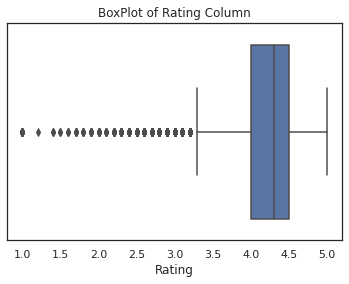

In [405]:
# BoxPlot

sns.boxplot(x= ps_df['Rating'] )
plt.title('BoxPlot of Rating Column')

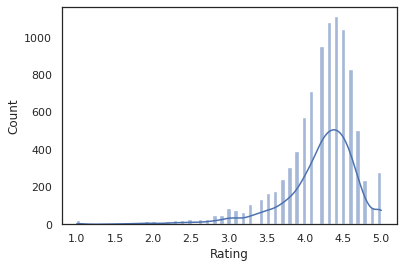

In [406]:
#Distplot

sns.histplot(ps_df['Rating'], kde= True)

* The mean of the average ratings (excluding the NaN values) comes to be 4.2.
* The median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.
* From the above distribution, it is clear that the ratings are left skewed.
* We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
* Hence we will impute the NaN values in the `Rating` column with its median.

In [407]:
# Replacing the NaN values in the 'Rating' colunm with its median value

ps_df['Rating'].fillna(value=median_rating, inplace=True)

In [408]:
ps_df.shape

(10830, 13)

In [409]:
# Checking NaN values in each column

ps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

The resultant number of rows after imputing the NaN values in the `Rating` column come out to be 10830.

Now we can say that there are no more NaN values in our Play Store Data Frame.

### **2. Handling Missing values of User Reviews data**

In [410]:
ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [411]:
ur_df.shape

(64295, 5)

Except the App column all 4 columns have almost equal amount of NaN values which is around 26863. In this case there is no way to impute that missing data so we would need to drop all the rows with any NaN values.

In [412]:
#Dropping the rows corresponding to the NaN values
ur_df.dropna(inplace= True)

In [413]:
ur_df.shape

(37427, 5)

In [414]:
ur_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Now we can say that all the null values are successfully handled in both the Data Frames.

## **Data Wrangling  and Analysis**

Data wrangling, also referred to as data munging, is the process of converting and mapping data from one raw format into another. The purpose of this is to prepare the data in a way that makes it accessible for effective use further down the line. Not all data is created equal, therefore it’s important to organize and transform your data in a way that can be easily accessed by others.

While an activity such as data wrangling might sound like a job for someone in the Wild West, it’s an integral part of the classic data pipeline and ensuring data is prepared for future use.

### **1. Play Store Data Wrangling and Analysis**

In [415]:
# Exploring the Data Types of Each columns
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10830 non-null  object 
 1   Category        10830 non-null  object 
 2   Rating          10830 non-null  float64
 3   Reviews         10830 non-null  object 
 4   Size            10830 non-null  object 
 5   Installs        10830 non-null  object 
 6   Type            10830 non-null  object 
 7   Price           10830 non-null  object 
 8   Content Rating  10830 non-null  object 
 9   Genres          10830 non-null  object 
 10  Last Updated    10830 non-null  object 
 11  Current Ver     10830 non-null  object 
 12  Android Ver     10830 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [416]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Findings**

- Apart from the `Rating` column all other columns are of 'object' Data Type.
- Features like `Reviews`, `Installs`, `Price` should be of numeric Data Type as it's impossible to perform numerical operations with 'object' Data Type.
- In order to get deep insights it's important to convert the required features in the proper data type like int, float etc.

Let's start exploring these features one by one and convert them to the required Data Type for further analysis.

In [417]:
# Checking the unique values inside the Price columns
ps_df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Looks like the price column has a lot of unique prices but they are stored in the form of a string. Important thing to note is that each price starts with a '$' symbol which needs to be removed in order to convert the  `Price` column to numeric data type(e.g. float). 

In [418]:
# Removing '$' symbol and converting Price column to float type
ps_df['Price']= ps_df['Price'].apply(lambda x: float(x.replace('$', '')))

In [419]:
ps_df['Price'].dtypes

dtype('float64')

In [420]:
# Checking unique values inside 'Installs' column
ps_df['Installs'].unique

<bound method Series.unique of 0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10830, dtype: object>

In [421]:
# Removing ',' and '+' symbol and converting the 'Installs' column to 'int' data type

ps_df['Installs']= ps_df['Installs'].apply(lambda x: int(''.join(x.split(',')).replace('+', '')))

In [422]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [423]:
ps_df.Installs.dtypes

dtype('int64')

In [424]:
# Converting 'Reviews' column to 'int' Data Type
ps_df['Reviews']= ps_df['Reviews'].astype(int)

In [425]:
ps_df['Reviews'].dtypes

dtype('int64')

In [426]:
# Exploring unique values counts inside Size columns
ps_df['Size'].value_counts()

Varies with device    1695
11M                    197
12M                    196
14M                    193
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

We can see that the values in the Size column contain data with different units. 'M' stands for MB and 'k' stands for KB. To easily analyze this column, it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB.

In [427]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

Applying the kb_to_mb function to convert the values in the Size column to a single unit of measure (MB) and the data type from string to float.

In [428]:
# The kb_to_mb funtion applied to the size column

ps_df['Size'] = ps_df['Size'].apply(lambda x: kb_to_mb(x))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [429]:
# Checking values in the size column of the updated dataframe

ps_df['Size'].value_counts()

Varies with device    1695
11.0                   197
12.0                   196
14.0                   193
13.0                   191
                      ... 
0.4199                   1
0.4189                   1
0.1953                   1
0.4492                   1
0.6045                   1
Name: Size, Length: 456, dtype: int64

A vast majority of the entries in the Size column contain the entry Varies with device. Since this entry cannot be used for analysis, let's see if it can be imputed with the mean or median value of the entries in this column.

In [430]:
# Finding max, min, mean, and median in the Size column excluding the 'Varies with device' values.

max_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].max()

min_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].min()

mean_size = round(ps_df[ps_df['Size'] != 'Varies with device']['Size'].mean(),4)

median_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].median()

[max_size, min_size, mean_size, median_size]

[100.0, 0.0083, 21.5346, 13.0]

Lets visualize the data in the size column using the boxplot and distplot.

Text(0.5, 1.0, 'Boxplot of Size column')

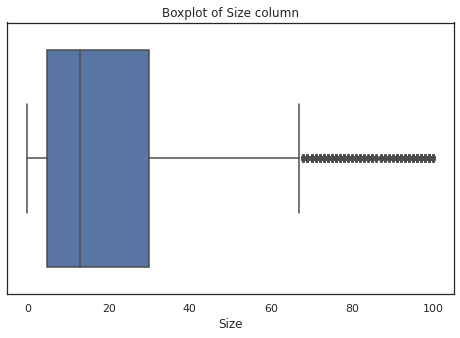

In [431]:
# Boxplot
plt.figure(figsize= (8,5))
sns.boxplot(data = ps_df[ps_df['Size'] != 'Varies with device']['Size'], x= ps_df[ps_df['Size'] != 'Varies with device']['Size'])
plt.title('Boxplot of Size column')

Text(0.5, 1.0, 'Distribution plot of Size')

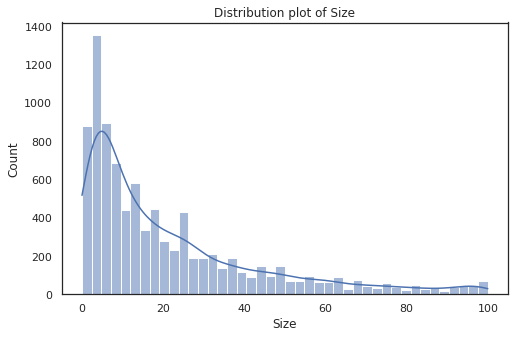

In [432]:
# Distplot
plt.figure(figsize= (8,5))
sns.histplot(ps_df[ps_df['Size'] != 'Varies with device']['Size'], kde= True)
plt.title('Distribution plot of Size')

- It is clear from the visualizations that the data in the Size column is skewed towards the right.
- Also, we see that a vast majority of the entries in this column are of the value Varies with device. In this case in order to further use this column in our analysis we need to replace this value with either Mean or Median.
- When the values are skewed then it's recommended to use Median instead of Mean.

In [433]:
# Replacing the value of 'Varies with device' with median of the Size column
ps_df['Size'].mask(ps_df['Size'] == 'Varies with device',median_size, inplace=True)


In [434]:
#Converting object to float type
ps_df['Size']= ps_df['Size'].astype(float)

In [435]:
ps_df['Size'].value_counts()

13.0000    1886
11.0000     197
12.0000     196
14.0000     193
15.0000     184
           ... 
0.4199        1
0.4189        1
0.1953        1
0.4492        1
0.6045        1
Name: Size, Length: 455, dtype: int64

In [436]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10830 non-null  object 
 1   Category        10830 non-null  object 
 2   Rating          10830 non-null  float64
 3   Reviews         10830 non-null  int64  
 4   Size            10830 non-null  float64
 5   Installs        10830 non-null  int64  
 6   Type            10830 non-null  object 
 7   Price           10830 non-null  float64
 8   Content Rating  10830 non-null  object 
 9   Genres          10830 non-null  object 
 10  Last Updated    10830 non-null  object 
 11  Current Ver     10830 non-null  object 
 12  Android Ver     10830 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [437]:
ps_df.describe()

,Rating,Reviews,Size,Installs,Price
count,10830.000000,1.083000e+04,10830.000000,1.083000e+04,10830.000000
mean,4.206519,4.445607e+05,20.198849,1.547847e+07,1.027996
std,0.480446,2.929081e+06,20.980982,8.506734e+07,15.957044
min,1.000000,0.000000e+00,0.008300,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,5.900000,5.000000e+03,0.000000
50%,4.300000,2.099500e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.481300e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [438]:
#Checking for duplicate values in the data frame
ps_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [439]:
# Inspecting Duplicate Values
ps_df[ps_df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [440]:
ps_df[ps_df['App'] == 'Candy Crush Saga']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1655,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1705,Candy Crush Saga,GAME,4.4,22428456,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1751,Candy Crush Saga,GAME,4.4,22428456,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1842,Candy Crush Saga,GAME,4.4,22429716,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1869,Candy Crush Saga,GAME,4.4,22430188,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1966,Candy Crush Saga,GAME,4.4,22430188,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
3994,Candy Crush Saga,FAMILY,4.4,22419455,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up


Clearly there are duplicate values of multiple apps in `App` columns. It's better to drop these duplicate values for better insights.

In [441]:
ps_df.shape

(10830, 13)

In [442]:
# dropping duplicates from the 'App' column.

ps_df.drop_duplicates(subset = 'App', inplace = True)

In [443]:
# Checking about the existance of duplicate values
ps_df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
INFAMY RO                                         1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
CK Shop                                           1
                                                 ..
Block City Wars + skins export                    1
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9649, dtype: int64

In [444]:
#Checking the shape of Data Frame after removing duplicate rows
ps_df.shape

(9649, 13)

Look's like all the duplicate apps and their corresponding values are successfully removed. 

In [445]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [446]:
# Dropping the least important columns which are not helpful for our analysis
ps_df.drop(['Last Updated', 'Current Ver', 'Android Ver'], axis= 1, inplace= True)
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


In [447]:
#Checking the shape of new dataframe
ps_df.shape

(9649, 10)

 Our new updated Play Store Data Frame has 9649 rows and 10 columns.

### **2. User Review Data Wrangling and Analysis**

In [448]:
# Inspecting the type of different columns
ur_df.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [449]:
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [450]:
print(ur_df['Sentiment_Polarity'].max())
print(ur_df['Sentiment_Polarity'].min())

1.0
-1.0


In [451]:
print(ur_df['Sentiment_Subjectivity'].max())
print(ur_df['Sentiment_Subjectivity'].min())

1.0
0.0


In [452]:
ur_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


**Findings**

- From the above User Review Data it can be seen that the values of `Sentiment_Polarity` lies between -1 to 1 and `Sentiment_Subjectivity` lies between 0 to 1. For example, if subjectivity value is near to 1 means it's a public opinion and if it is near 0 means it's factual data. Also if the Polarity is close to 1 means positive statement and close to -1 means a negative statement. 

- The mean and median of `Sentiment_Polarity` is (0.182171, 0.150000) and `Sentiment_Subjectivity` is (0.492770, 0.514286).

- There is not much difference between mean and median, just a slight difference so it can be said it is following Normal distribution.

- There is low standard deviation for `Sentiment_Subjectivity` than polarity indicating it is very close to mean compared to polarity variable.


## **Data Visualization**

### **1. Univariate Analysis**

Uni means one and variate means variable, so in univariate analysis, there is only one dependable variable. The objective of univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in it. In a dataset, it explores each variable separately. It is possible for two kinds of variables- Categorical and Numerical.

Some patterns that can be easily identified with univariate analysis are Central Tendency (mean, mode and median), Dispersion (range, variance), Quartiles (interquartile range), and Standard deviation.


 Univariate data can be described through **Frequency Distribution Table**, **Bar Charts**, **Histograms**, **Pie Charts**, **Frequency Polygons** etc.

In [453]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


Text(0.5, 1.0, 'Top Categories on Playstore')

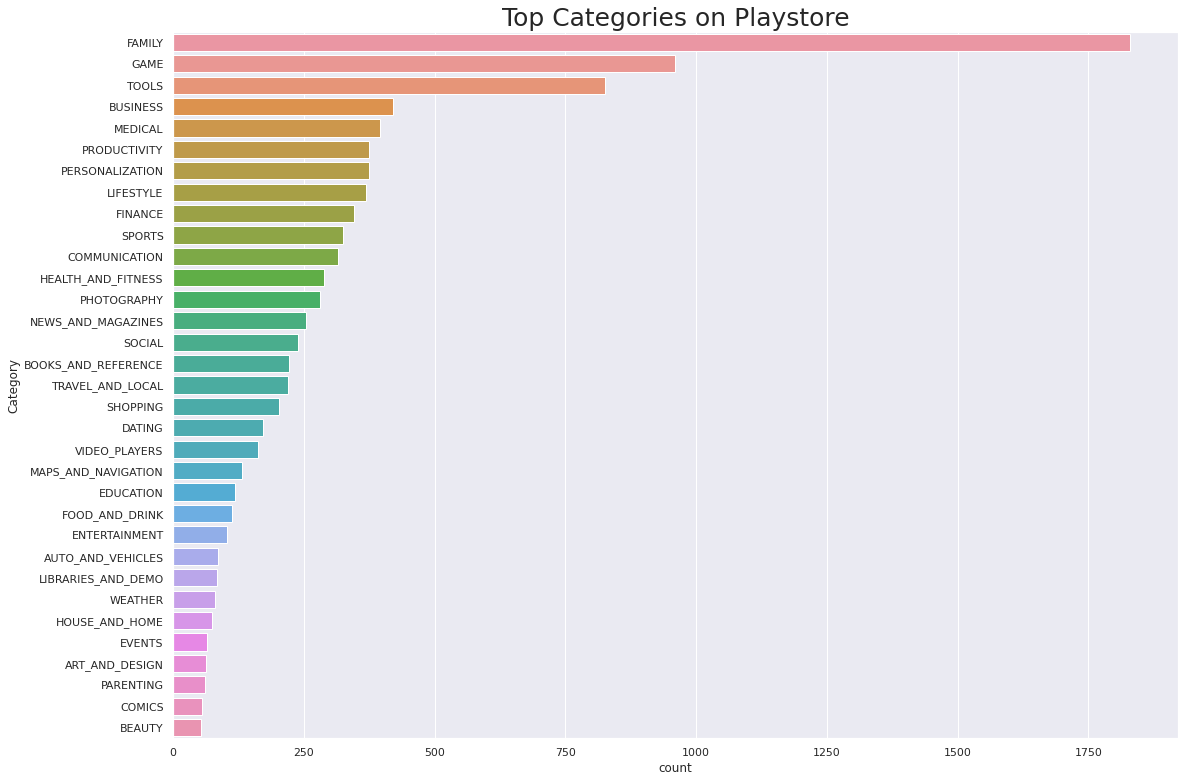

In [454]:
# Visualising `Category` column using Seaborn countplot 
sns.set(style='darkgrid')
plt.figure(figsize= (18,13))
sns.countplot(y='Category', data= ps_df, order = ps_df['Category'].value_counts().index)
# plt.xticks(rotation='vertical')
plt.title('Top Categories on Playstore', fontsize = 25)

**Findings:**

- Majority of the apps in Play Store fall under 'Family' category followed by 'Game' and 'Tools'.

- The category 'Family' has 1829 apps, 'Games' has 959 apps, 'Tools' has 825 apps and all other categories have apps less than 500 in Play Store data.

- The least available apps fall under category 'Beauty', 'Comics', 'Parenting' etc.



Text(0.5, 1.0, 'Paid Vs Free apps')

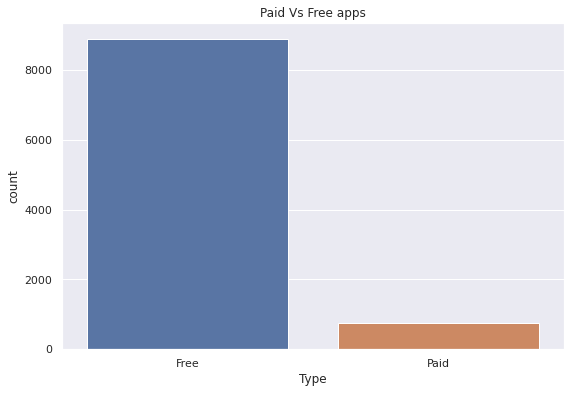

In [455]:
# Visualising 'Type' column using barplot and Pie-chart
plt.figure(figsize= (9, 6))
sns.countplot(x= 'Type', data= ps_df)
plt.title('Paid Vs Free apps')

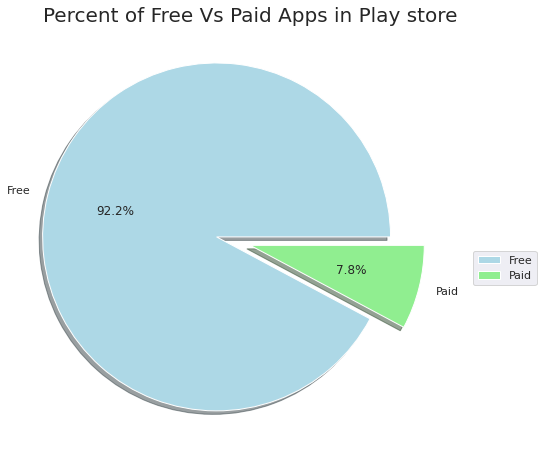

In [456]:
# Pie Chart for Type column
plt.figure(figsize=(10,8))
labels = ps_df['Type'].value_counts(sort = True).index
sizes = ps_df['Type'].value_counts(sort = True)
colors = ["lightblue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode= explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in Play store',size = 20)
plt.legend(labels= labels, bbox_to_anchor=(1,0.5))
plt.show()

**Findings**:

- There are 92.6% of free apps in the play store vs 7.8% of paid apps.

- There are more free apps than paid apps. Since most of the apps are cost free, there are more chances for the common people to install the apps easily and use it for their daily needs and other uses increases the app engagement by users which positively impacts the success rate of the apps in the Play store.


Text(0, 0.5, 'Apps(Count)')

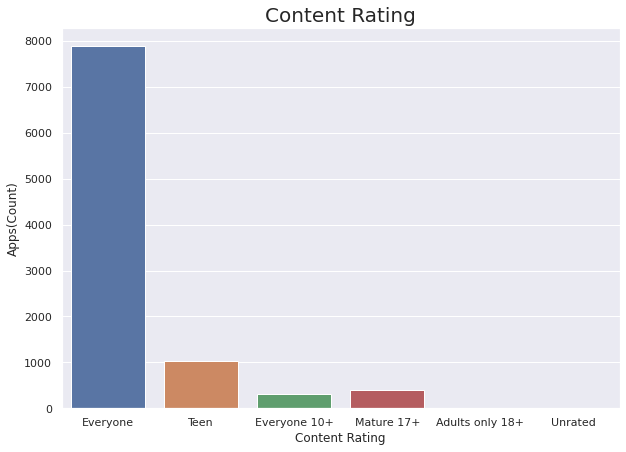

In [457]:
plt.figure(figsize=(10,7))
sns.countplot(x='Content Rating', data= ps_df)
# plt.xticks(rotation=50)
plt.title('Content Rating', size= 20)
plt.ylabel('Apps(Count)')

**Findings:**

- There are 6 categories in content rating out of which majority of the apps are available for 'Everyone'. Next category of content rating apps are used by only 'Teen'. Next apps are rated as to be used by 'Mature 17+' followed by 'Everyone 10+'
- This shows that developers who list the apps for everyone have higher reachability and increased app engagement as compared to other content rating apps like 'Teens', 'Adults' etc.

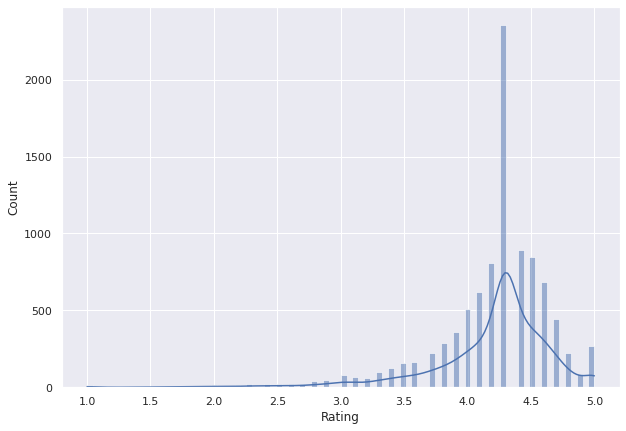

In [458]:
# Histogram for Rating column
plt.figure(figsize= (10,7))
sns.histplot(ps_df['Rating'], kde= True)

- From the above histogram we can see that the rating for most apps lies between 4 to 4.8. 

- The distribution is left skewed. There is a very high peakedness at rating 4.3 to 4.4, which means that a lot of apps have been given a rating of 4.3 and 4.4 by the users.
 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 22.518631
Kurtosis: 519.380967


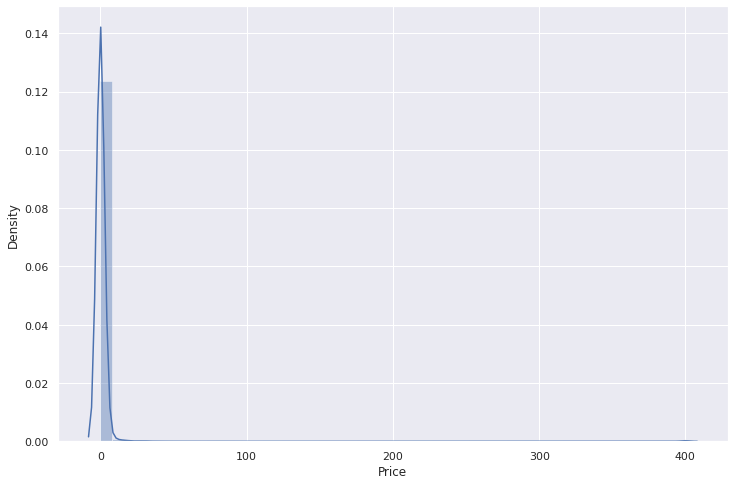

In [459]:
# Histogram for Price column
plt.figure(figsize= (12,8))
sns.distplot(ps_df['Price'], hist=True,kde=True)

#skewness and kurtosis
print("Skewness: %f" % ps_df['Price'].skew())
print("Kurtosis: %f" % ps_df['Price'].kurt())

- From the above dist plot it can be said that there are more free apps which require no money to purchase or install them. They are free to use and may include in-app purchases or subscriptions after a certain period.

- There are even costly apps which are more than 400$!

- The skewness indicates it is a right-tail distribution because of some costly apps present in the play store. The Kurtosis is much higher than the normal because of the peakedness or consistency of many free apps.

Text(0, 0.5, 'Genres(App Count)')

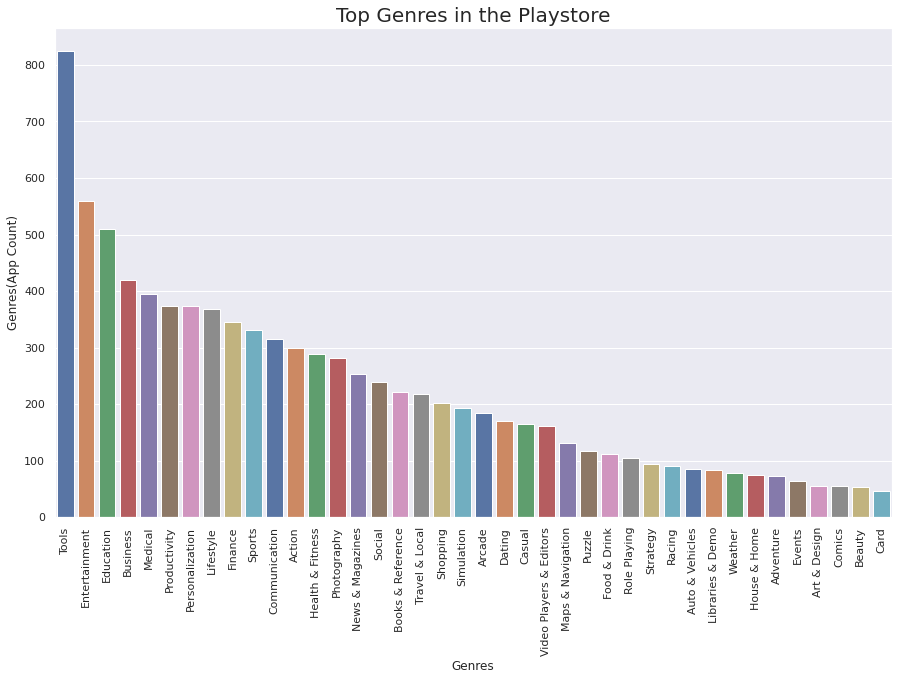

In [460]:
# Visualising `Genres` column using Seaborn countplot 
sns.set(style='darkgrid')
plt.figure(figsize= (15,9))
sns.countplot(x='Genres', data= ps_df, order = ps_df['Genres'].value_counts()[0:40].index, palette="deep")
plt.xticks(rotation='vertical')
plt.title("Top Genres in the Playstore", fontsize = 20)
plt.ylabel('Genres(App Count)')

**Findings:** 

From the above visualization we can see that the Highest Number of Apps found are Tools and Entertainment genres followed by Education, Productivity, Finance and many more.

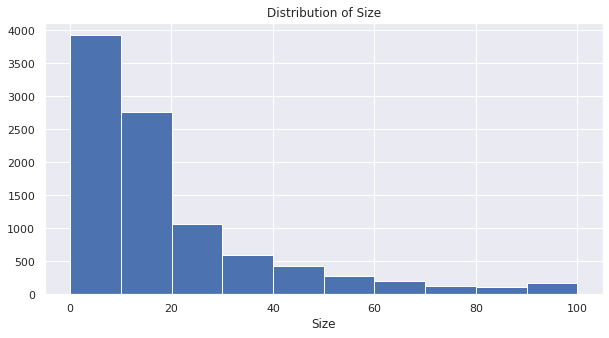

In [461]:
# Histogram of size column
plt.figure(figsize= (10,5))
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(ps_df['Size']);
plt.show()

Most of the app size is in between 0-20 MB. There are even apps with greater size than normal. They require upto 100 MB which takes more space of a system.

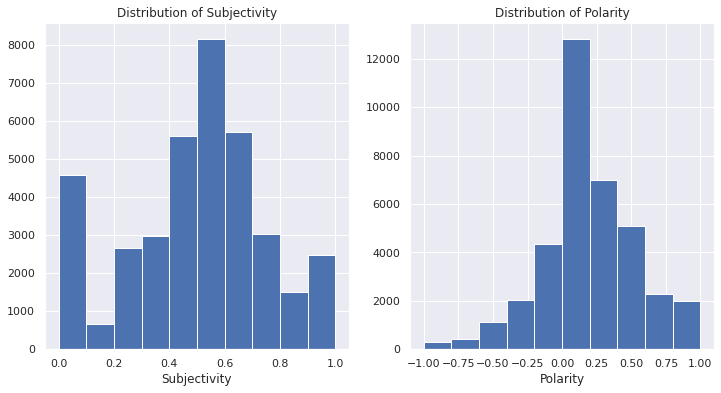

In [462]:
# Histogram of 'Content_Subjectivity' and 'Content_Polarity'
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")  
plt.hist(ur_df['Sentiment_Subjectivity'])
plt.subplot(1,2,2)
plt.xlabel("Polarity")
plt.title("Distribution of Polarity")
plt.hist(ur_df['Sentiment_Polarity'])
plt.show();

- From the User Reviews data it is clearly evident that the `Sentiment_Subjectivity` lies between 0 to 1 and `Sentiment_Polarity` lies between -1 to 1. Also it can be seen that there is a peakedness in the middle of the distribution for both Subjectivity and Polarity.

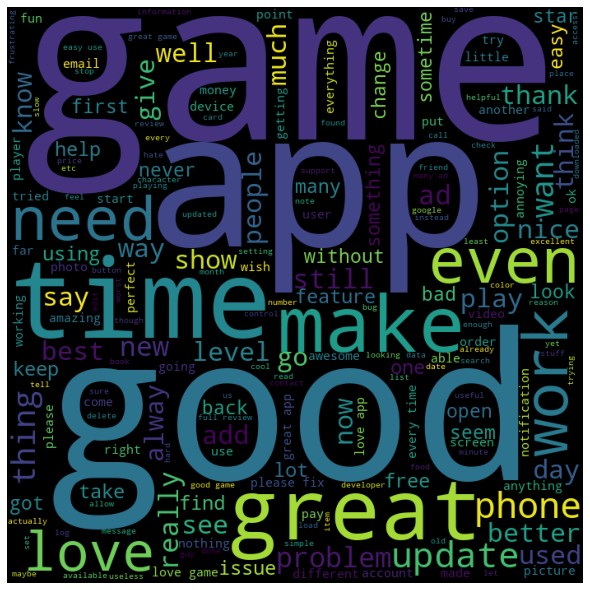

In [463]:
# Word Cloud to visualise most used words in 'Translated_Review' column under User Review Data

from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in ur_df.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. 


- From the above Word Cloud it can be seen that the word game is bigger than any other words, next comes good, app and so on. It can also be said that there are positive words that can be seen which indicates there are a lot of apps which are given positive reviews by the Users.
- The most commonly used words from Users Translated reviews says that they have used more positive words to say about their app experience and which says it has good app engagement by its users. So this definitely tells about good user experience and good word of mouth increases the publicity for the app then it impacts the success rate of the respective apps.

### **2. Bivariate Analysis**

**Bi means two and variate means variable, so here there are two variables. The analysis is related to cause and the relationship between the two variables.** 

**We will compare two different features to get different insights from them.**

In [464]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


Let's first start comparing category column with Reviews, Rating and Installs


Text(0.5, 1.0, 'Most Number of Installs per Category')

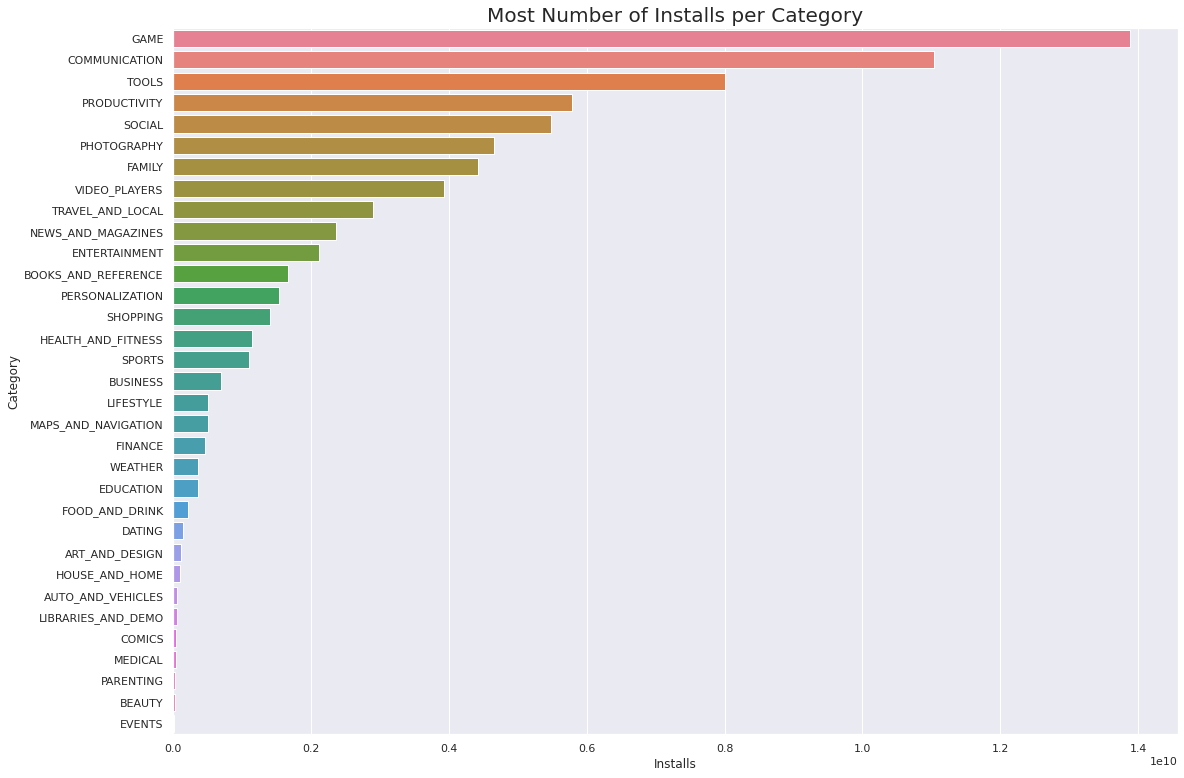

In [465]:
# Barplot to visualise Category and Reviews column

Cat_wise_installs= ps_df.groupby('Category')['Installs'].sum().reset_index().sort_values(by= 'Installs', ascending= False)

plt.figure(figsize= (18,13))
sns.barplot(x='Installs', y= 'Category', data= Cat_wise_installs, palette= 'husl')
plt.title('Most Number of Installs per Category', fontsize= 20)

**Findings:**

- 'Games' Category has the maximum number of Installs followed by 'Communication' and 'Tools'.

- The Category 'Games' has almost 14 Billion installations, next is 'Communication' which has around 11 Billion installations, then we have 'Tools' which has around 8 Billion installations. Rest other Categories have installations less than 6 Billion.

- From this barplot we can infer that the developers who make apps related to 'Games', 'Communication' and 'tools' have a wide customer base as these categories have the maximum number of installations.

Text(0.5, 1.0, 'Average Installs per Category')

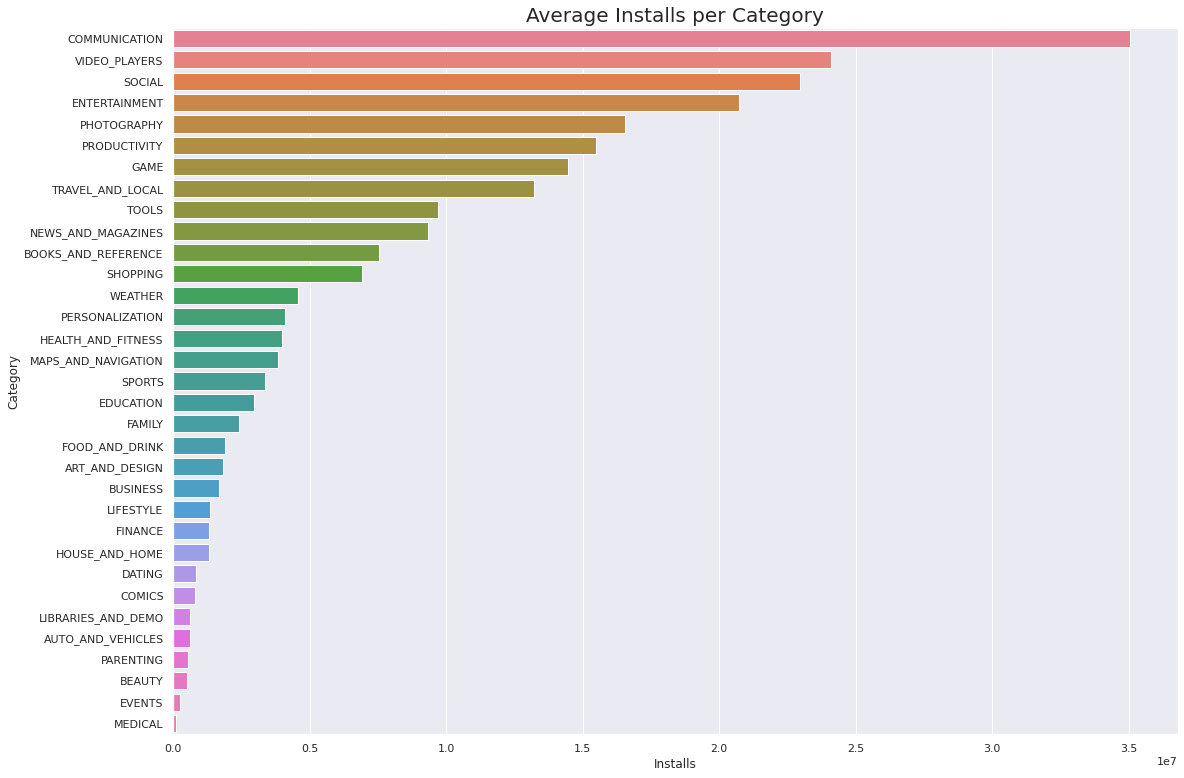

In [466]:
# Barplot to visualise average number of installation per category

Cat_wise_installs= ps_df.groupby('Category')['Installs'].mean().reset_index().sort_values(by= 'Installs', ascending= False)

plt.figure(figsize= (18,13))
sns.barplot(x='Installs', y= 'Category', data= Cat_wise_installs, palette= 'husl')
plt.title('Average Installs per Category', fontsize= 20)

- It can be seen from the above plot, the average number of installs in each category and it can also be deduced that the installs are highest for 'Communication', 'Video Players', 'Social' and 'Entertainment' categories.

- From the above two plots it is quite evident that apps under these Categories are the priority apps by the users. All the users of android mobile do install the  communication(chat apps), Social(google, fb, snap..) apps first then go for Photography, Entertainment, Education and so on as present in this data and same for reviews to the respective categories. 

Text(0.5, 1.0, 'Total Number of Reviews per Category')

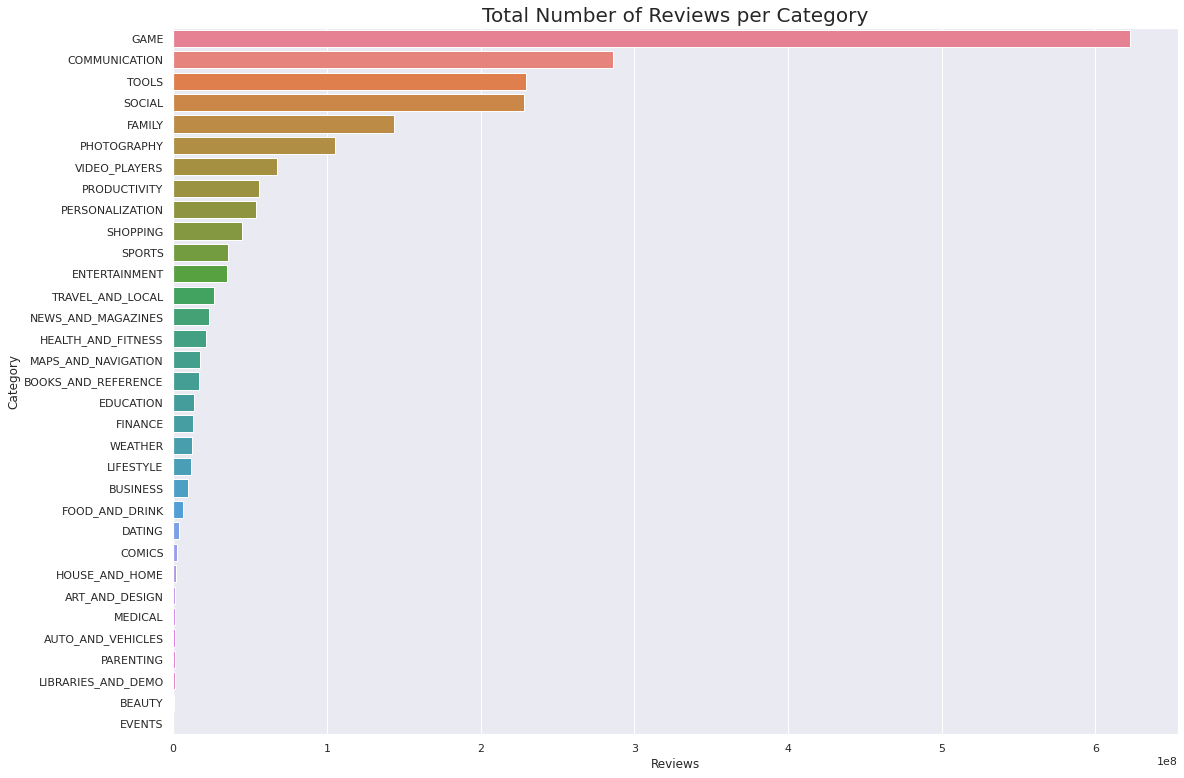

In [467]:
# Barplot to visualise Category and Reviews column

Cat_wise_reviews= ps_df.groupby('Category')['Reviews'].sum().reset_index().sort_values(by= 'Reviews', ascending= False)

plt.figure(figsize= (18,13))
sns.barplot(x='Reviews', y= 'Category', data= Cat_wise_reviews, palette= 'husl')
plt.title('Total Number of Reviews per Category', fontsize= 20)

**Findings:**

- It can be seen from the above plot, the total number of reviews of all apps in each category. And also it can be seen that the reviews are highest for Games, Communication, Tools and Social Categories.

- The Category 'Game' has 622 Million reviews, next 'Communication' has around 286 Million reviews. Categories like Tools and Social around 229 and 228 Million reviews respectively. Rest all categories have reviews less than 150 Million.

Text(0.5, 1.0, 'Average Size of apps per Category in MB')

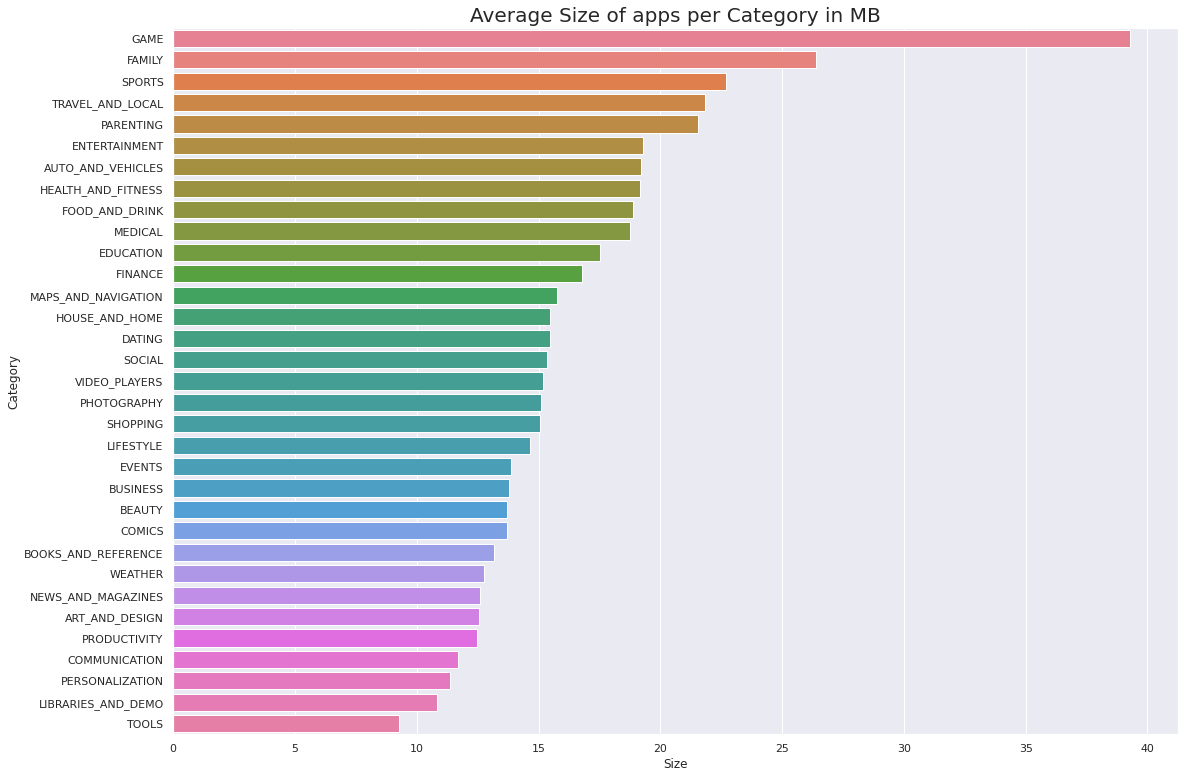

In [468]:
# Barplot to visualise Category and Reviews column

Cat_wise_reviews= ps_df.groupby('Category')['Size'].mean().reset_index().sort_values(by= 'Size', ascending= False)

plt.figure(figsize= (18,13))
sns.barplot(x='Size', y= 'Category', data= Cat_wise_reviews, palette= 'husl')
plt.title('Average Size of apps per Category in MB', fontsize= 20)

- From the above plot we can infer that the Game category has a high average size of apps which is around 40 MB followed by the 'Family' and 'Sports' category.

In [469]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


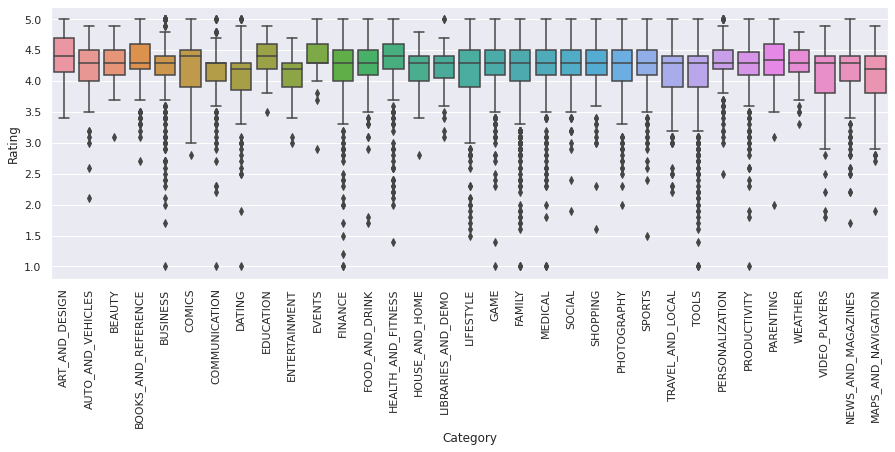

In [470]:
# Boxplot to visualise median of rating for each Categories
f,ax1 = plt.subplots(ncols=1)
sns.boxplot(x = 'Category',y='Rating',data=ps_df)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

**Findings:**

- From the above boxplot it can be seen that the median rating of all the categories are greater than 4.0. By knowing the reviews and improving the app features, it can help to improve the app engagement. Also by looking at the overall rating it can be said that this is a good sign for the high success rate of the apps.

In [471]:
# Creating a df containing only paid apps

paid_df = ps_df[ps_df['Type'] == 'Paid']
paid_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,13.0,100000,Paid,3.99,Everyone,Communication
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,13.0,10000,Paid,3.99,Mature 17+,Dating
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating


Text(0.5, 1.0, 'Average price of paid apps in each category')

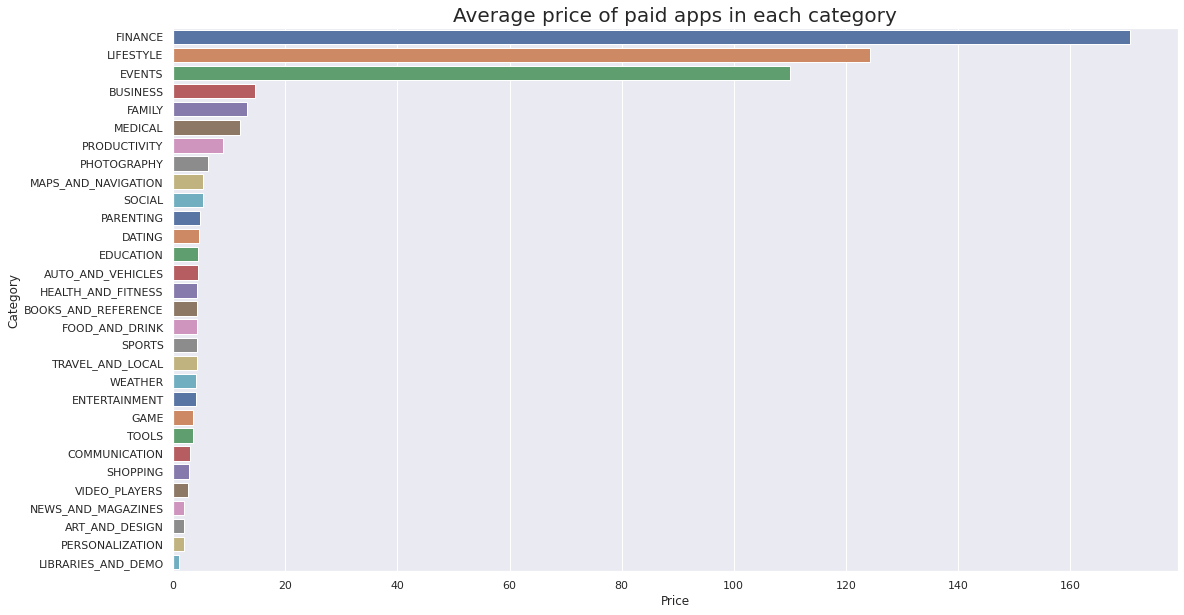

In [472]:
# Average price of paid apps in each category

Cat_vs_price= paid_df.groupby('Category')['Price'].mean().reset_index().sort_values(by= 'Price', ascending=False)
plt.figure(figsize= (18,10))
sns.barplot(x='Price', y= 'Category', data= Cat_vs_price, palette= 'deep')
plt.title('Average price of paid apps in each category', fontsize= 20)

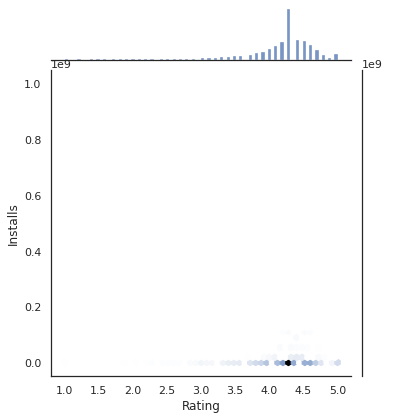

In [473]:
# Joint plot to visualise Ratings, Installs columns
sns.set(style='white')
sns.jointplot(x = 'Rating',y = 'Installs',data = ps_df,kind = 'hex')


From the above jointplot it can be seen that high rated apps have a high number of installations increasing the success rate of an app.

Text(0.5, 1.0, 'Price VS Rating')

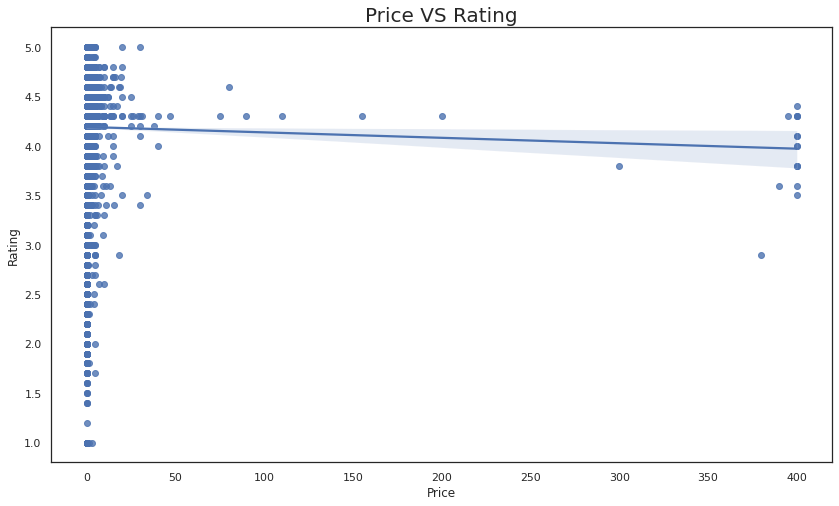

In [474]:
# regplot to visualize Price and Rating column

fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Price", y="Rating", data=ps_df)
plt.title("Price VS Rating", size=20)

From the above regplot we can see that there is a slight negative correlation  between Price and Rating column. As the price increases the Rating tends to  decrease slightly for those apps.

In [475]:
# Merging the Play Store data with User Reviws data on Application column
merged_df = ps_df.merge(ur_df, on="App")
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count']) # Log transformed values for Sentiment count

In [476]:
category_sentiment

,Category,Sentiment,Sentiment Count,log_sentiment_count
0,ART_AND_DESIGN,Negative,61,5.930737
1,ART_AND_DESIGN,Neutral,62,5.954196
2,ART_AND_DESIGN,Positive,259,8.016808
3,AUTO_AND_VEHICLES,Negative,17,4.087463
4,AUTO_AND_VEHICLES,Neutral,36,5.169925
...,...,...,...,...
94,VIDEO_PLAYERS,Neutral,58,5.857981
95,VIDEO_PLAYERS,Positive,190,7.569856
96,WEATHER,Negative,28,4.807355
97,WEATHER,Neutral,31,4.954196


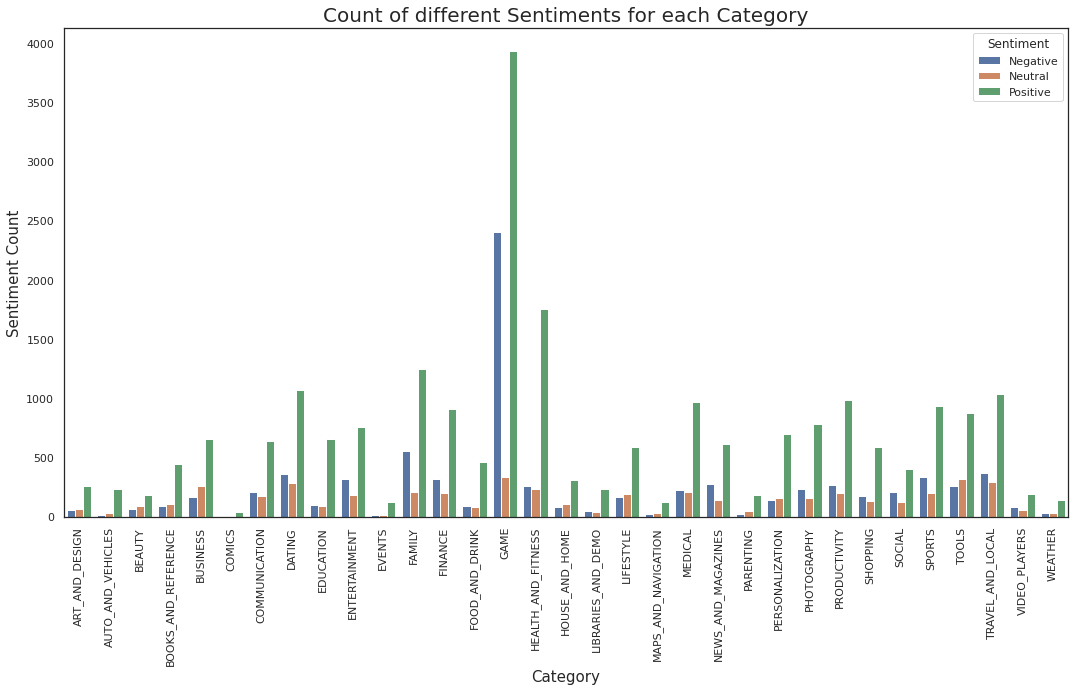

In [477]:
# Bar plot for different Sentiments for Each categories
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Sentiment Count", fontsize=15)
plt.title("Count of different Sentiments for each Category",fontsize=20)
sns.barplot(x='Category',y='Sentiment Count', hue='Sentiment', data=category_sentiment);

**Findings**

- The Play Store data is merged with the User Reviews dataset on the App column. Form the merged Dataset the count of different Sentiments like Positive, Negative and Neutral is calculated based on each category.
- From the above count plot we can infer that there are more number of Positive reviews than Negative and Neutral reviews among all the apps. The highest positive and negative reviews are received by apps in the Game Category.

-  Most of the apps have more positive reviews than negative and neutral reviews which says the Play store apps business is good and the success rate for the apps is also much higher even though there are some negative reviews in User reviews dataset with good app engagement features in the apps.

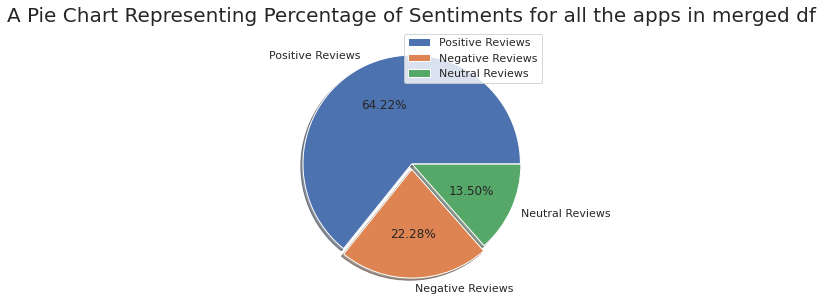

In [478]:
# Pie chart for Sentiments in Merged Dataframe

counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,5)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Sentiments for all the apps in merged df', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

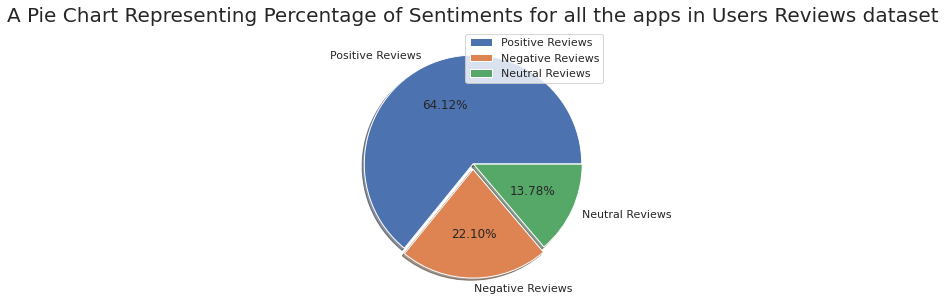

In [479]:
# Pie chart for Sentiments in User Reviews Dataframe

counts1 = list(ur_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,5)
plt.pie(counts1, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Sentiments for all the apps in Users Reviews dataset', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

- Both the Pie Charts obtained from Merged Data Frame and User Reviews give us the same result that there are more positive reviews for the apps than Negative and Neutral reviews.

- This sentiment tells that there is a good user interaction with apps and good app engagement with the apps for the users. So it has a positive impact on the success of the apps in the playstore.

### **3. Multivariate Analysis**

Multivariate analysis is required when more than two variables have to be analyzed simultaneously. There are more than 20 different ways to perform multivariate analysis and which one to choose depends upon the type of data and the end goal to achieve. 

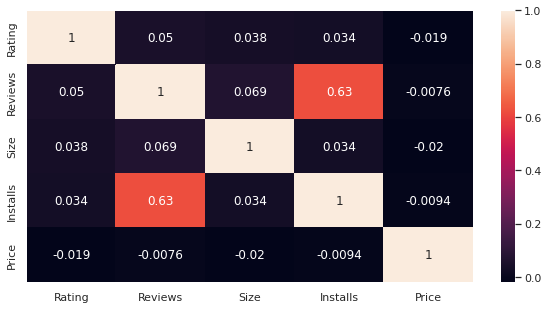

In [480]:
# Coorelation heatmap of PlayStore df

coor_matrix= ps_df.corr()
sns.heatmap(coor_matrix, annot= True)

- There exists a positive correlation between 'Installs' and 'Reviews' columns which means if the number of installation of apps increases then the reviews for the app will tend to increase too. Although the reviews can be positive, negative or neutral, the probability of positive reviews are higher than the negative or neutral reviews as seen in the above analysis.

- All the other variables are not correlated with each other.

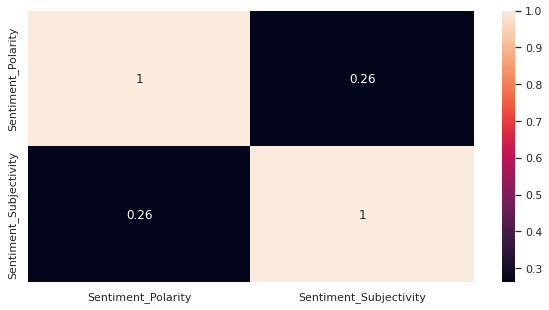

In [481]:
# Coorelation heatmap of User Reviews df

cor_matrix= ur_df.corr()
sns.heatmap(cor_matrix, annot= True)

- Sentiment polarity and subjectivity have little correlation between them and it doesn't affect much as it doesn't have high multicollinearity.

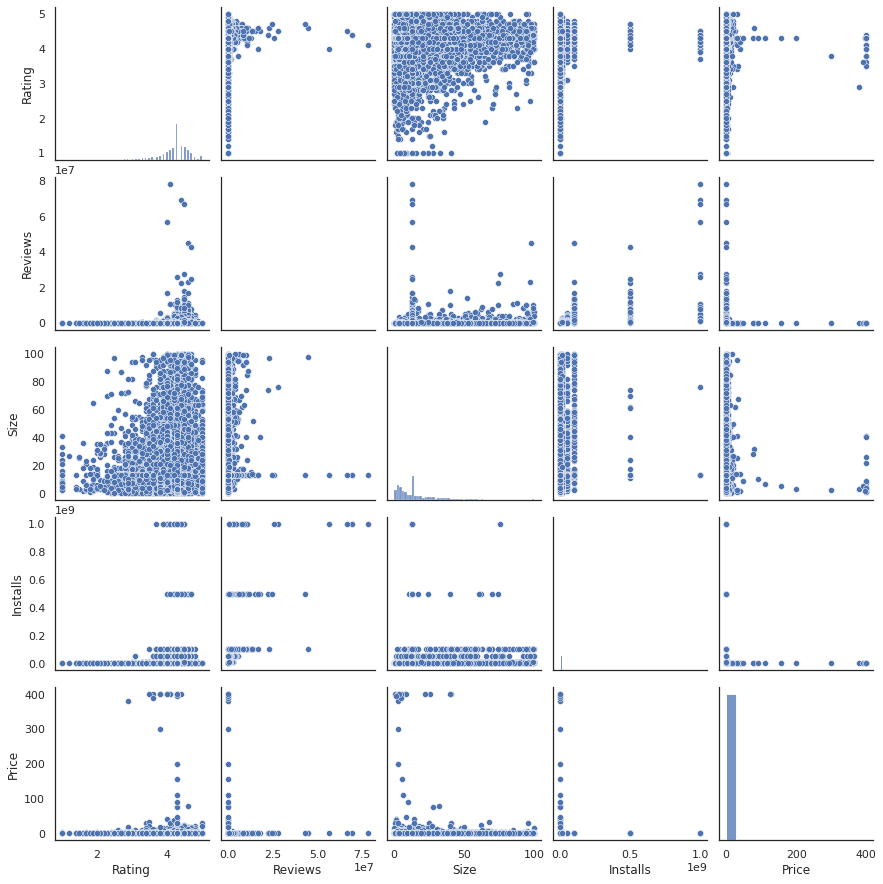

In [482]:
sns.pairplot(ps_df)

# **Analysis Summary:**

* Percentage of free apps = 92.2%
* Percentage of Paid apps = 7.8&
* Most competitive category: Family
* Top Genres: Tools
* Category with the highest number of installs and reviews: Game
* Category with the highest average app installs: Communicaction
* Category in which the paid apps have the highest average installation fee: Finance
* Most popular app in the Play Store based on the number of reviews: Facebook
* The median size of all apps in the play store is 13 MB.
* User reviews contain mostly positive words and the most used words are Game, good, app, great etc according to WordCloud.
* There are more number of Positive reviews as compared to Negative and Neutral reviews.
* Median rating of all the categories are greater than 4.0
* There is Positive correlation  between Installs and Reviews columns.

# **Conclusion**

- After thorough  analysis it can be said that the most important features that help in predicting the success rate of an app are the Rating, Reviews, Installs and Type of an app.

- The features in Users review dataset that would help in the success rate and app engagement are Sentiment then Sentiment polarity and subjectivity.

- There are many categories of apps present in the play store and the apps that are high in particular categories are Communication, Social and Gaming apps. It can be inferred that these apps are more successful and have high app engagement.

-  From the analysis it is seen that there are a good number of apps with positive reviews than negative and neutral reviews.

- There are more apps in the Play store that are given reviews by the users. There are more ratings given to an app than the reviews. "Yes, I do it too" and from the analysis we can say that most user's fall under the same category as it's a choice to rate and review the app. As review takes time so many just rate the app and avoid reviewing. 



##**Takeaways for the Developer's:**
- Developing apps related to the least categories as they are not explored much. Like events and beauty etc.
- Most of the apps are Free, so focusing on free apps is more important.
- Focusing more on content available for Everyone will increase the chances of getting the highest installs.
- The sentiments of the user keep varying as they keep using the app, so it's important to focus more on users needs and features and make changes in the apps accordingly.